In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Reading

In [2]:
df = pd.read_csv("Churn Modeling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
df.shape

(10000, 14)

### The dataset has 10000 rows and 14 columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Data Cleaning

In [8]:
# Lets check for null values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### It has no null values, but in the data set I think RowNumber column has no use for our analysis.So, lets drop the column.

In [9]:
# Droping RowNuber column
df.drop('RowNumber',axis=1,inplace = True)

In [10]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### We can see that row number column is dropped from the dataset

C:\Users\tejasri\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


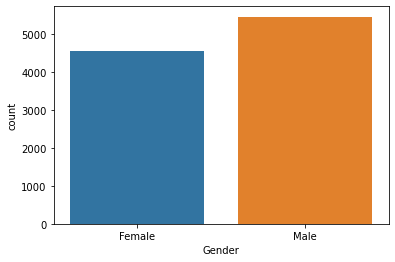

In [11]:
sns.countplot(df.Gender)
plt.show()

### In Gender column Males are more in number than Female

C:\Users\tejasri\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


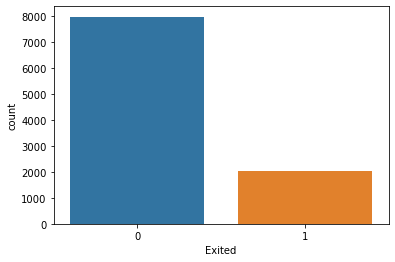

In [12]:
sns.countplot(df.Exited)
plt.show()

C:\Users\tejasri\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


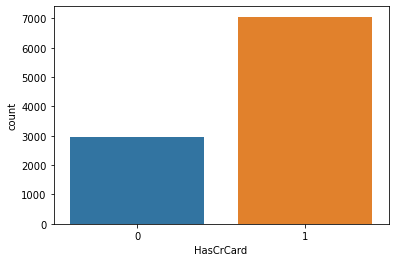

In [13]:
sns.countplot(df.HasCrCard)
plt.show()

In [14]:
# Lets check for the customer who is having maximum balance
df.Balance.describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

In [15]:
df.CustomerId.describe()

count    1.000000e+04
mean     1.569094e+07
std      7.193619e+04
min      1.556570e+07
25%      1.562853e+07
50%      1.569074e+07
75%      1.575323e+07
max      1.581569e+07
Name: CustomerId, dtype: float64

In [16]:
df.CreditScore.describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

In [17]:
df.Age.describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

In [18]:
df.Tenure.describe()

count    10000.000000
mean         5.012800
std          2.892174
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Tenure, dtype: float64

In [19]:
df.NumOfProducts.describe()

count    10000.000000
mean         1.530200
std          0.581654
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: NumOfProducts, dtype: float64

In [20]:
df.HasCrCard.describe()

count    10000.00000
mean         0.70550
std          0.45584
min          0.00000
25%          0.00000
50%          1.00000
75%          1.00000
max          1.00000
Name: HasCrCard, dtype: float64

In [21]:
df.	IsActiveMember.describe()

count    10000.000000
mean         0.515100
std          0.499797
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: IsActiveMember, dtype: float64

In [22]:
df.	EstimatedSalary.describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

In [23]:
df.Exited.describe()

count    10000.000000
mean         0.203700
std          0.402769
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Exited, dtype: float64

In [24]:
maxBalance = df.Balance.max()
df[df.Balance == maxBalance]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2092,15757408,Lo,655,Spain,Male,38,3,250898.09,3,0,1,81054.0,1


In [25]:
maxCreditScore = df.CreditScore.max()
df[df.CreditScore == maxCreditScore]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
38,15717426,Armstrong,850,France,Male,36,7,0.00,1,1,1,40812.90,0
180,15716334,Rozier,850,Spain,Female,45,2,122311.21,1,1,1,19482.50,0
200,15604482,Chiemezie,850,Spain,Male,30,2,141040.01,1,1,1,5978.20,0
223,15733247,Stevenson,850,France,Male,33,10,0.00,1,1,0,4861.72,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9581,15709256,Glover,850,France,Female,28,9,0.00,2,1,1,164864.67,0
9646,15603111,Muir,850,Spain,Male,71,10,69608.14,1,1,0,97893.40,1
9688,15730579,Ward,850,France,Male,68,5,169445.40,1,1,1,186335.07,0
9931,15647800,Greco,850,France,Female,34,6,101266.51,1,1,0,33501.98,0


In [26]:
df.CreditScore.mean()

650.5288

In [27]:
maxTenure = df.Tenure.max()
df[df.Tenure == maxTenure]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
12,15632264,Kay,476,France,Female,34,10,0.00,2,1,0,26260.98,0
50,15616550,Chidiebele,698,Germany,Male,44,10,116363.37,2,1,0,198059.16,0
67,15641582,Chibugo,735,Germany,Male,43,10,123180.01,2,1,1,196673.28,0
79,15803136,Postle,416,Germany,Female,41,10,122189.66,2,1,0,98301.61,0
85,15805254,Ndukaku,652,Spain,Female,75,10,0.00,2,1,1,114675.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9934,15774586,West,692,Germany,Female,43,10,118588.83,1,1,1,161241.65,1
9945,15674000,Cattaneo,645,France,Male,44,10,0.00,2,0,1,166707.22,0
9950,15638494,Salinas,625,Germany,Female,39,10,129845.26,1,1,1,96444.88,0
9956,15707861,Nucci,520,France,Female,46,10,85216.61,1,1,0,117369.52,1


In [28]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

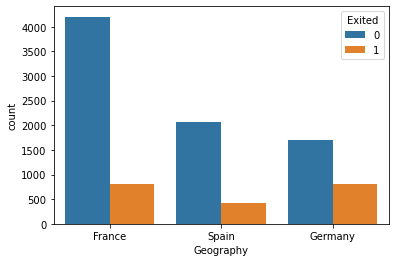

In [29]:
sns.countplot(data = df , x="Geography", hue="Exited")
plt.show()

In [30]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

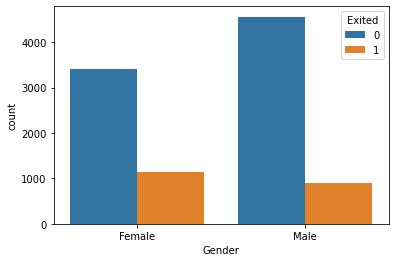

In [31]:
sns.countplot(data = df , x="Gender", hue="Exited")
plt.show()

In [32]:
df.IsActiveMember.unique()

array([1, 0], dtype=int64)

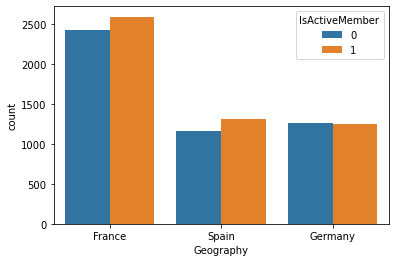

In [33]:
sns.countplot(data = df , x="Geography", hue="IsActiveMember")
plt.show()

In [34]:
df.HasCrCard.unique()

array([1, 0], dtype=int64)

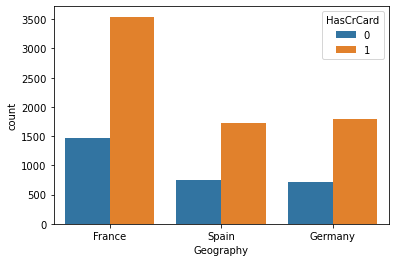

In [35]:
sns.countplot(data = df , x="Geography", hue="HasCrCard")
plt.show()

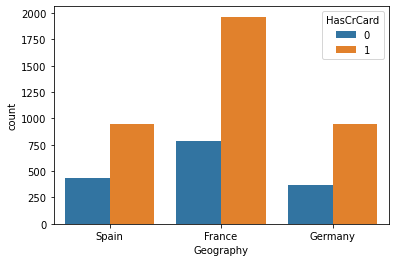

In [36]:
sns.countplot(data = df[df.Gender == "Male"] , x="Geography", hue="HasCrCard")
plt.show()

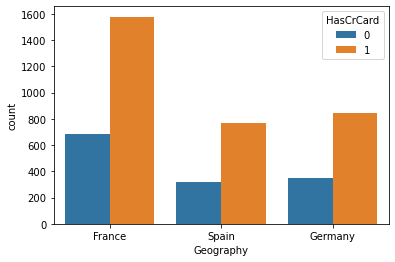

In [37]:
sns.countplot(data = df[df.Gender == "Female"] , x="Geography", hue="HasCrCard")
plt.show()

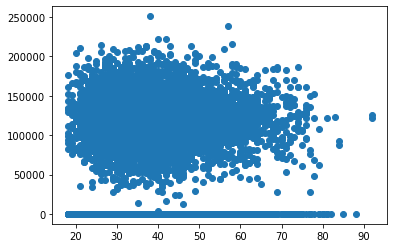

In [38]:
plt.scatter(df.Age,df.Balance)
plt.show()

In [39]:
dfExited = df[df.Exited == 1]

In [40]:
dfExited.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1


C:\Users\tejasri\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


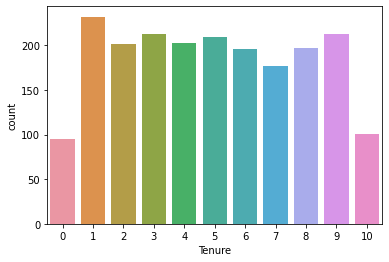

In [41]:
sns.countplot(dfExited.Tenure)
plt.show()

C:\Users\tejasri\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


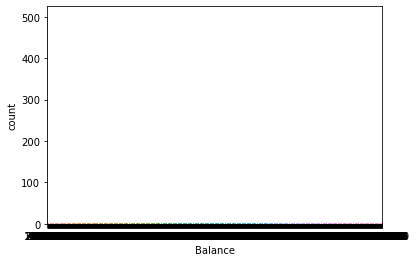

In [42]:
sns.countplot(dfExited.Balance)
plt.show()

In [43]:
dfExited.Tenure.mean()

4.932744231713304

<AxesSubplot:>

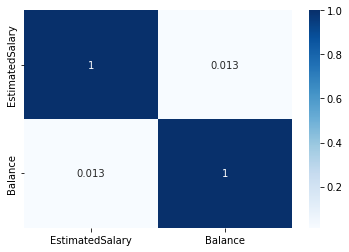

In [44]:
sns.heatmap(df[["EstimatedSalary","Balance"]].corr(), annot=True, cmap="Blues")

<AxesSubplot:>

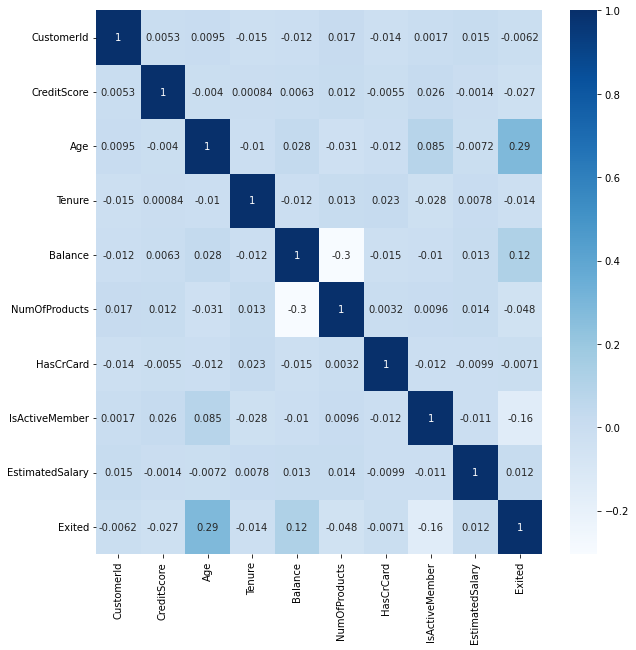

In [47]:
fig = plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot=True, cmap="Blues")